In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.




## 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

1.1 \
Read the data and do exploratory data analysis (3 pts). 

Describe the data briefly. Interpret the inferences for each (3 pts). 

#Initial steps like head() .info(), Data Types, etc . 

#Null value check. 

#Distribution plots(histogram) or similar plots for the continuous columns.

#Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. 

#Summary stats, Skewness, Outliers proportion should be discussed, and inferences from above used plots should be there. 

There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct. \
6

In [42]:
df_bank=pd.read_csv('bank_marketing_part1_Data.csv')
df_bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [ ]:
df_bank.info()

There are no null values. \
All the features are numeric, no categorical variable present 

In [ ]:
df_bank.dtypes

All the features are numeric, no categorical variable present 

In [ ]:
df_bank.shape

Total 210 records and 7 features are there in the given dataset

In [ ]:
df_bank.isna().sum()

No null values across all the features

In [ ]:
df_bank.duplicated().sum()

Threre are no duplicated records in the dataset

## Data Dictionary for Market Segmentation:

1) spending: Amount spent by the customer per month (in 1000s)\
2) advance_payments: Amount paid by the customer in advance by cash (in 100s)\
3) probability_of_full_payment: Probability of payment done in full by the customer to the bank\
4) current_balance: Balance amount left in the account to make purchases (in 1000s)\
5) credit_limit: Limit of the amount in credit card (10000s)\
6) min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)\
7) max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)


In [ ]:
df_bank.describe().T

1) Average spending is ~14.8 (1000s) per month by the customers\
2) Average credit_limit is ~3.25 (10000s) for all 210 customers 

In [ ]:
print('Average percentage of spendings per month for the available credit limit for the 210 customers is',(df_bank['spending'].mean())/(df_bank['credit_limit'].mean()*10)*100)

3) On an average, 87.09% of customers are doing the full payment

4) It shows that average current balance is less on comparing to the average credit_limit, which indicates customers' spendings are more

In [ ]:
print('Average percentage of current_balance comparing to average credit_limit is',(df_bank['current_balance'].mean())/(df_bank['credit_limit'].mean()*10)*100)

5) Maximum amount spent by a customer in single shopping is 6.55 (in 1000s)

6) On an average, minimum amount paid by customers while making purchases made monthly is ~3.70 (100s)

7) On an average, ~14.55 (100s) amount paid by the customers in advance by cash

8) Variation in the data is very minimum for all the features

## Data Pre-processing:

There are no null values. \
All the features are numeric, no categorical variable present 

Total 210 records and 7 features are there in the given dataset

Threre are no duplicated records in the dataset

Anamolies are not observed in the dataset

## Data visualization

Univariate analysis

In [ ]:
df_bank.hist(bins=10, figsize=(20,32), layout=(6,3))

In [ ]:
round(df_bank.skew(),2)

'Spending', 'advance_payments', 'credit_limit', 'min_payment_amt' are normally distributed features

'probability_of_full_payment' is slightly left skewed distribution

'current_balance', 'max_spent_in_single_shopping' are slightly right skewed distributions

Checking for outliers and its porportions:

In [ ]:
plt.figure(figsize = (12,12))
feature_list = df_bank.columns
for i in range(len(feature_list)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y = df_bank[feature_list[i]], data = df_bank)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

Outliers are absent in all the features except for 'probability_of_full_payment', 'min_payment_amt' with very minimum outliers. 

'probability_of_full_payment' has outliers in lower range and 'min_payment_amt' has outliers in upper range 

Let us check how much proportion outliers are present in 'probability_of_full_payment', 'min_payment_amt'


In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range    

In [ ]:
#'probability_of_full_payment
lr1,ur1=remove_outlier(df_bank['probability_of_full_payment'])
print("lower range",lr1, "and upper range", ur1)

In [ ]:
df_bank[df_bank['probability_of_full_payment']<0.810587581]

We can clearly see, there are 3 outlier records out of 210 records in 'probability_of_full_payment' feature

In [ ]:
print('Outlier proportion for probability_of_full_payment feature is', (3/210)*100)

In [ ]:
#'min_payment_amt'
lr2,ur2=remove_outlier(df_bank['min_payment_amt'])
print("lower range",lr2, "and upper range", ur2)

In [ ]:
df_bank[df_bank['min_payment_amt']>8.079625]

There are 2 upper range outlier records in 'min_payment_amt'

In [ ]:
print('Outlier proportion for min_payment_amt feature is', (2/210)*100)

As we can see, there is very less proportion of outliers in the above discussed two features. So, we can skip the outlier treatment for this dataset

Bivariate analysis:

In [ ]:
sns.pairplot(df_bank);

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df_bank.corr(),annot=True,fmt=".2f");

Insights:

There is very good correlation between all the features except for below mentioned pairs:
1) min_payment_amt has negative correlation with the all features

2) 'probability_of_full_payment' is moderately correlated with 'spending', 'advance_payments', 'credit_limit', weakly correlated with 'current_balance', 'max_spent_in_single_shopping' and negatively correlated with 'min_payment_amt'

Multivariate analysis is not possible for given dataset as we donot have any categorical variable


## 1.2  Do you think scaling is necessary for clustering in this case? Justify

1.2 Do you think scaling is necessary for clustering in this case? 

Justify The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc.

Should justify whether there is a necessity for scaling and which method is he/she using to do the scaling. Can also comment on how that method works.\
2

Scaling is necessary for clustering in this case because all of the numerical features are not on same weight. So we need to transform the features onto same scale. 

For example, 

1) features like 'spending', 'current_balance', 'max_spent_in_single_shopping' are on 1000s scale  

2) features like 'advance_payments', 'min_payment_amt' are on 100s scale

3) credit_limit is on 10000s scale

4) 'probability_of_full_payment' feature is in range of 0 to 1

So, we should do the scaling for this dataset. 

Let us scale the data using 'zscale' method. This method scales the data in such a way that the mean value of the features tends to 0 and the standard deviation tends to 1


In [ ]:
from scipy.stats import zscore

In [ ]:
df_bank_scaled = df_bank.apply(zscore)
df_bank_scaled.head()

Dataset has been scaled successfully.


## 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

1.3 Apply hierarchical clustering to scaled data (3 pts). 

Identify the number of optimum clusters using Dendrogram and briefly describe them (4). 

Students are expected to apply hierarchical clustering. It can be obtained via Fclusters or Agglomerative Clustering. 

Report should talk about the used criterion, affinity and linkage. 

Report must contain a Dendrogram and a logical reason behind choosing the optimum number of clusters and Inferences on the dendrogram. 

Customer segmentation can be visualized using limited features or whole data but it should be clear, correct and logical. Use appropriate plots to visualize the clusters.\
7

Hierarchical clustering is applied on the scaled dataset. Clusters are created between the variables ‘spending’ and ‘current balance’ with a consideration that based on the spending and balance available, business can identify the customer profile from segmentation perspective.

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
plt.figure(figsize=(18, 14))
plt.title("Market Segmentation Dendograms")
wardlink = linkage(df_bank_scaled, method = 'ward')
dend = dendrogram(wardlink)
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()

In [ ]:
plt.figure(figsize=(18, 8))
plt.title('Heirarchical clustering dendrogram(truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 ) 
plt.show()

However as normally to understand the dataset, normally 2 clusters are not preferred because in most of the cases, business is already aware about the 2 classes in the dataset and hence to generate some more insights, segmentation with more than 2 clusters is preferred.

As an example, for a bank dataset, bank would like to know more than ‘good’ and ‘not so good’ customers and hence more insight we are able to generate with more than 2 clusters, better it is for business.

Hence let’s consider 3 clusters and plot the clusters to confirm if the desired clusters are providing the required segmentation details.

Let us use scipy's Fcluster method:

In [ ]:
from scipy.cluster.hierarchy import fcluster 

In [ ]:
fclusters = fcluster(wardlink, 3, criterion='maxclust') 
fclusters

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(df_bank_scaled['spending'],df_bank_scaled['current_balance'],c=fclusters,cmap='rainbow')
plt.title('Customer segments')
plt.xlabel('Spending')
plt.ylabel('Current Balance')
plt.show()

We can see 3 clusters segmentation clearly.

In [ ]:
df_bank['fclusters'] = fclusters

In [ ]:
df_bank.head()


## 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

1.4 Apply K-Means clustering on scaled data and determine optimum clusters (2 pts). \
Apply elbow curve and silhouette score (3 pts). \
Interpret the inferences from the model (2.5 pts). 

K-means clustering code application with different number of clusters. 

Calculation of WSS(inertia for each value of k) Elbow Method must be applied and visualized with different values of K.

Reasoning behind the selection of the optimal value of K must be explained properly.

Silhouette Score must be calculated for the same values of K taken above and commented on. 

Report must contain logical and correct explanations for choosing the optimum clusters using both elbow method and silhouette scores. Append cluster labels obtained from K-means clustering into the original data frame. Customer Segmentation can be visualized using appropriate graphs.\
7

In [ ]:
from sklearn.cluster import KMeans 

In [ ]:
wss =[] 


In [ ]:
for i in range(1,10):
    KM = KMeans(n_clusters=i)
    KM.fit(df_bank_scaled)
    wss.append(KM.inertia_)

In [ ]:
wss

In [ ]:
plt.plot(range(1,10), wss)
plt.xlabel('No. of clusters')
plt.ylabel('k-means inertia')
plt.title('Elbow curve plot')


From both elbow curve and inertia method, we can choose 3 clusters as optimal number because inertia drop is less for k=3 compared to k=2. 

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df_bank_scaled)
labels3 = k_means.labels_
labels3


In [ ]:
df_bank["Clus_kmeans"] = labels3
df_bank.head(5)

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(df_bank_scaled['spending'],df_bank_scaled['current_balance'],c=labels3,cmap='rainbow')
plt.title('k-means Customer segments')
plt.xlabel('Spending')
plt.ylabel('Current Balance')
plt.show()

In [ ]:
ss = {}

for i in range(2, 11):
    kclusters = KMeans(n_clusters=i)
    labels = kclusters.fit_predict(df_bank_scaled)
    sil=silhouette_score(df_bank_scaled,labels)
    ss[i]=round(sil,3)
    print('The average silhouette score for {} clusters is {}'.format(i,sil))

In [ ]:
plt.bar(ss.keys(),ss.values())
plt.title('Average Silhouette Score Comaprison')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhoutte Score')
plt.show()

As per the silhouette score, optimal number of clusters are 2. However as mentioned earlier, 2 is not preferred way of profiling the dataset and hence the ideal number of clusters to be considered is 3. With a silhouette score of ~0.40.

In [ ]:
df_bank.head(
)

In [ ]:
kcluster1=df_bank[df_bank['Clus_kmeans']==0]
kcluster2=df_bank[df_bank['Clus_kmeans']==1]
kcluster3=df_bank[df_bank['Clus_kmeans']==2]

In [ ]:
kcluster3.mean() #red

## 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

1.5 Describe cluster profiles for the clusters defined (2.5 pts).\
Recommend different promotional strategies for different clusters in context to the business problem in-hand (2.5 pts ).

After adding the final clusters to the original dataframe, do the cluster profiling.\
Divide the data in the finalyzed groups and check their means.\
Explain each of the group briefly. There should be at least 3-4 Recommendations. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. \
Full marks will only be allotted if the recommendations are correct and business specific. variable means.\
Students to explain the profiles and suggest a mechanism to approach each cluster. Any logical explanation is acceptable.\
5

In [ ]:
kcluster1.describe().T #purple

In [ ]:
kcluster2.describe().T #green

In [ ]:
kcluster3.describe().T #red

	Promotional strategies: Based on the clusters obtained from k-means clustering strategy for different segment of customers is as follows:

•	Type 1 Customers (Represented by purple dots in the k-means cluster plot wherein both spending and current balance are low): \
If we compare the mean ‘current_balance’ of Type 1 customers (5.23) and Type 3 customers (5.51) (discussed below) are almost similar. But spendings vary for both. So, there are customers in this segment who are having the balance, but less interested in spendings. Banks should attract this particular customer segment with some kind of discounts, vouchers etc.

•	Type 2 Customers (Represented by Green Dots in the k-means cluster plot wherein both spending and current balance are high):\
This is probably a high value customer and hence special discounted pricing based promotional campaigns for this group to increase their spending and use current balance.

•	Type 3 Customers (Represented by Red Dots in the k-means cluster plot wherein both spending and current balance are moderate):\
Further analysis could be performed to understand what would make this segment to move into green area.


## Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.



Attribute Information:

1. Age of insured (Age)

2. Code of tour firm (Agency_Code)

3. Type of tour insurance firms (Type)

4. Target: Claim Status (Claimed)

5. The commission received for tour insurance firm (Commission is in percentage of sales)

6. Distribution channel of tour insurance agencies (Channel)

7. Duration of the tour (Duration in days)

8. Amount worth of sales per customer in procuring tour insurance policies in rupees (in 100’s)

9. Name of the tour insurance products (Product)

10. Destination of the tour (Destination)


## 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

2.1 Read the data and do exploratory data analysis (4 pts).\
Describe the data briefly. Interpret the inferences for each (2 pts).\

#Initial steps like head() .info(), Data Types, etc .\
#Null value check.\
#Distribution plots(histogram) or similar plots for the continuous columns. \
#Box plots, Correlation plots. 
#Appropriate plots for categorical variables. Inferences on each plot. \
#Summary stats, Skewness, Outliers proportion should be discussed, and inferences from above used plots should be there. \
There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.\
6

In [5]:
df_insurance = pd.read_csv('insurance_part2_data.csv')
df_insurance.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


The dataset loaded successfully

In [6]:
df_insurance.dtypes

Age               int64
Agency_Code      object
Type             object
Claimed          object
Commision       float64
Channel          object
Duration          int64
Sales           float64
Product Name     object
Destination      object
dtype: object

There are both numeric and object variables.

In [7]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


There are no null values.

There are total 4 numeric and 6 object type variables

In [6]:
df_insurance.shape

(3000, 10)

There are total 3000 records and 10 features in the dataset.

In [4]:
df_insurance.duplicated().sum()

139

In [5]:
df_insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


Let's descrbe each feature below:

1) Age: Mean age is ~38 years. There is no variation in this feature.

2) Commision: \
Commision is in percentage on sales. \
Minimum commision is 0% \
Maximum percentage is 210.21, which should not be the case. This error need to be treated.

In [6]:
df_insurance[df_insurance['Commision']==0].nunique()

Age              55
Agency_Code       2
Type              1
Claimed           2
Commision         1
Channel           2
Duration        187
Sales           142
Product Name      2
Destination       3
dtype: int64

In [14]:
df_insurance[df_insurance['Commision']==0]['Type'].value_counts()

Travel Agency    1366
Name: Type, dtype: int64

In [15]:
df_insurance[df_insurance['Commision']>0]['Type'].value_counts()

Airlines         1163
Travel Agency     471
Name: Type, dtype: int64

Majority of the Travel Agencies are taking zero percent commision on sales.

In [ ]:
df_insurance[df_insurance['Commision']>100]['Channel'].unique()

Some of the 'Online' channels are taking more than 100% commision.

3) Duration:\
On an average, customers have travelled 70 days using several term insurances available.\
There is huge variation in the data for this feature. 

4) Sales:\
On an average, customers spent ~60000 on tour policies.\
There is variation in the dataset for this feature.

## Data Pre-processing:

There are no null values in the dataset.

There are total 4 numeric and 6 object type variables.

There are total 3000 records and 10 features in the dataset.

There are no anamolies present.

Total 139 duplicated records are there in the dataset.


In [8]:
dups=df_insurance.duplicated()
df_insurance[dups]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [8]:
df_insurance[dups]['Commision'].value_counts()

0.00     127
63.21      3
54.00      2
15.00      1
46.96      1
28.80      1
4.39       1
29.70      1
12.40      1
6.00       1
Name: Commision, dtype: int64

In [9]:
df_insurance[dups]['Destination'].value_counts()

ASIA        138
Americas      1
Name: Destination, dtype: int64

In [10]:
df_insurance[dups]['Type'].value_counts()

Travel Agency    128
Airlines          11
Name: Type, dtype: int64

So, we can see 127 records are from zero percent 'Commision' records and 138 records are from 'ASIA' destination.

But, it can be of different customers, there is no customer ID or any unique identifier, so we are not dropping them off.

## Data visualization

Univariate analysis:

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Commision'}>],
       [<AxesSubplot:title={'center':'Duration'}>,
        <AxesSubplot:title={'center':'Sales'}>]], dtype=object)

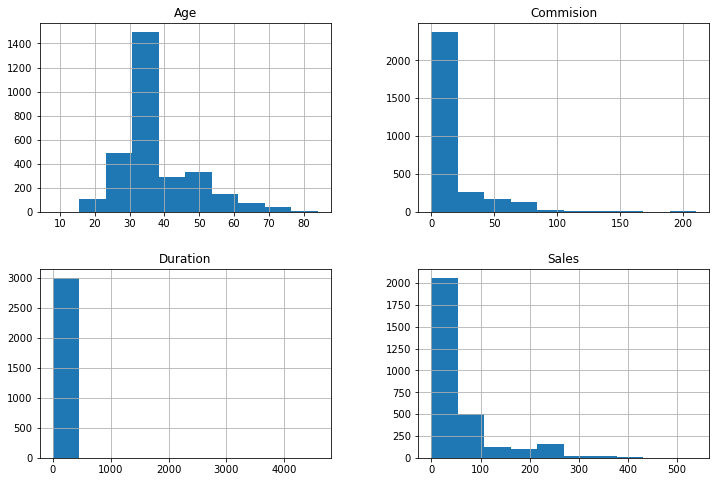

In [11]:
df_insurance.hist(bins=10, figsize=[12,8])

In [19]:
df_insurance.skew()

C:\Users\sireesha\AppData\Local\Temp/ipykernel_22232/4250087436.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_insurance.skew()


Age           1.149713
Commision     3.148858
Duration     13.784681
Sales         2.381148
dtype: float64

All numeric features are highly right skewed distributions and 'Duration' is very highly right skewed

Checking for outliers:

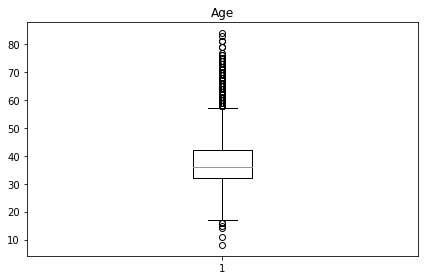

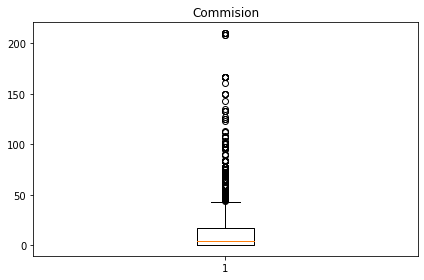

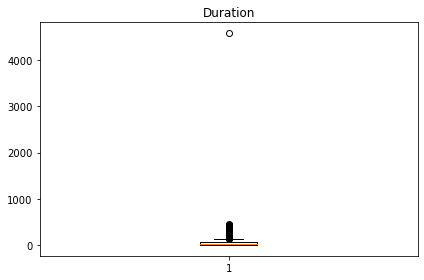

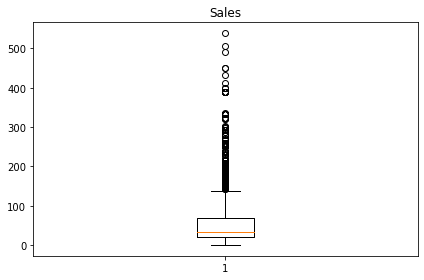

In [9]:
columns=['Age','Commision','Duration','Sales']
for i in columns:
    plt.figure()
    plt.title(i)
    plt.boxplot(df_insurance[i])
    plt.tight_layout()

Outliers are present in all numeric features.

Treatment of outliers:

In [10]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range    

In [11]:
#Age
lra,ura=remove_outlier(df_insurance['Age'])
df_insurance['Age']=np.where(df_insurance['Age']>ura,ura,df_insurance['Age'])
df_insurance['Age']=np.where(df_insurance['Age']<lra,lra,df_insurance['Age'])

#Commision
lrc,urc=remove_outlier(df_insurance['Commision'])
df_insurance['Commision']=np.where(df_insurance['Commision']>urc,urc,df_insurance['Commision'])
df_insurance['Commision']=np.where(df_insurance['Commision']<lrc,lrc,df_insurance['Commision'])

#Duration
lrd,urd=remove_outlier(df_insurance['Duration'])
df_insurance['Duration']=np.where(df_insurance['Duration']>urd,urd,df_insurance['Duration'])
df_insurance['Duration']=np.where(df_insurance['Duration']<lrd,lrd,df_insurance['Duration'])

#Sales
lrs,urs=remove_outlier(df_insurance['Sales'])
df_insurance['Sales']=np.where(df_insurance['Sales']>urs,urs,df_insurance['Sales'])
df_insurance['Sales']=np.where(df_insurance['Sales']<lrs,lrs,df_insurance['Sales'])

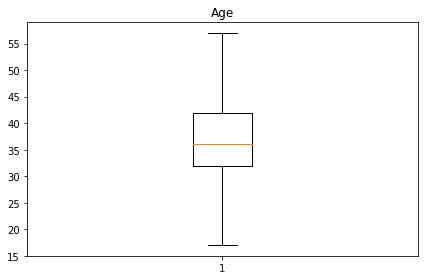

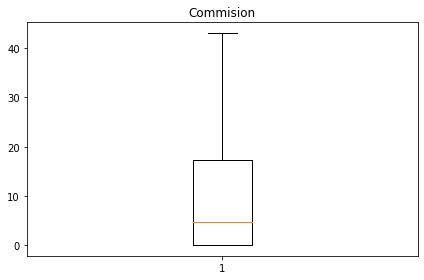

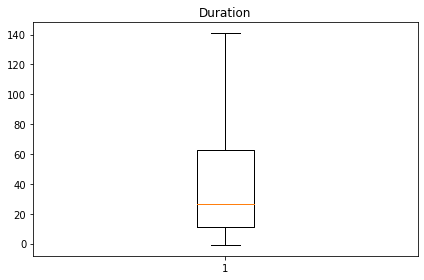

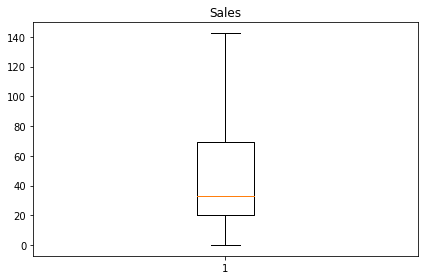

In [12]:
for i in columns:
    plt.figure()
    plt.title(i)
    plt.boxplot(df_insurance[i])
    plt.tight_layout()

Outliers are treated succesfully before making the models.

Bivariate analysis:

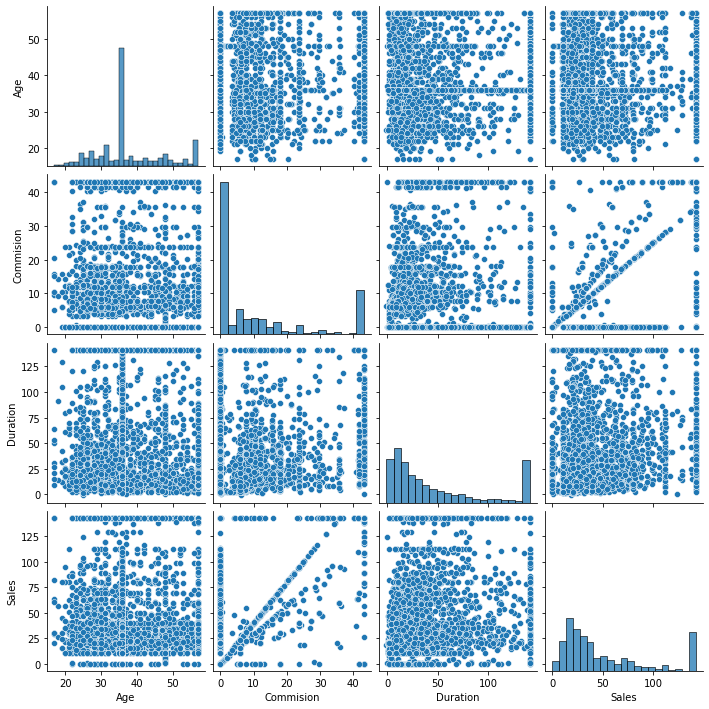

In [24]:
sns.pairplot(df_insurance);

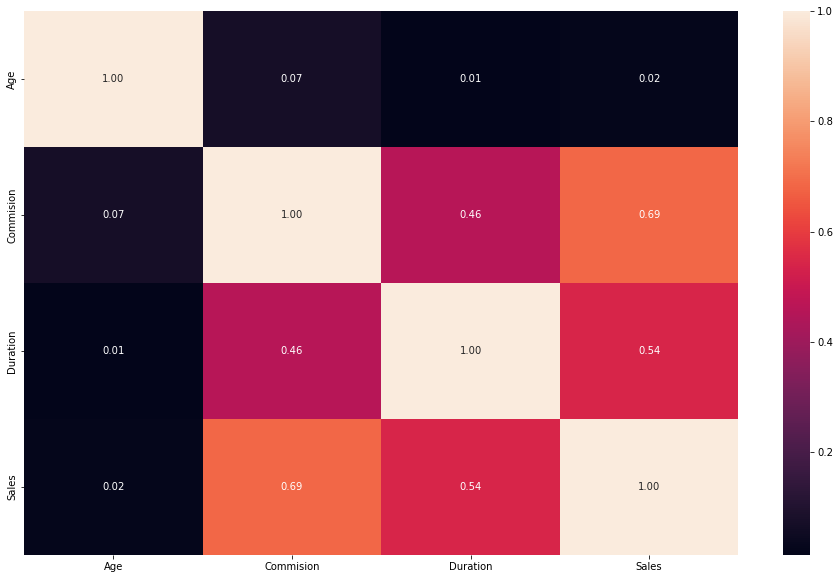

In [25]:
plt.figure(figsize=(16,10))
sns.heatmap(df_insurance.corr(),annot=True,fmt=".2f");

'Commision' and 'Sales' have moderate correlation among all the pairs.

Multivariate analysis:

Text(0.5, 1.0, 'Box plot of Agency code and Sales')

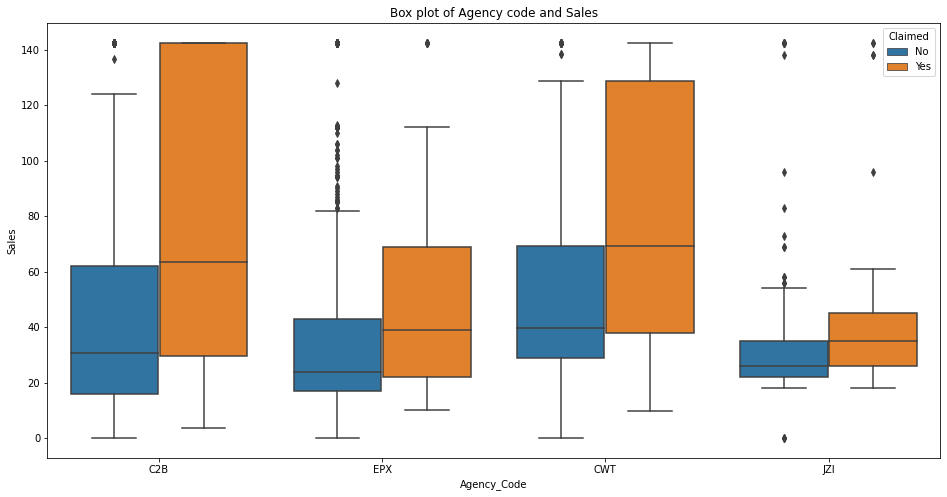

In [13]:
plt.figure(figsize=[16,8])
sns.boxplot(x='Agency_Code',y='Sales', hue='Claimed', data=df_insurance)
plt.title('Box plot of Agency code and Sales')

Insights:\
1) C2B Agency has more sales for claimed customers.

2) CWT Agency has more sales for non-claimed customers.

3) JZI Agency has less sales for both claimed and non-claimed customers

Text(0.5, 1.0, 'Box plot of Type and Sales for Claim status')

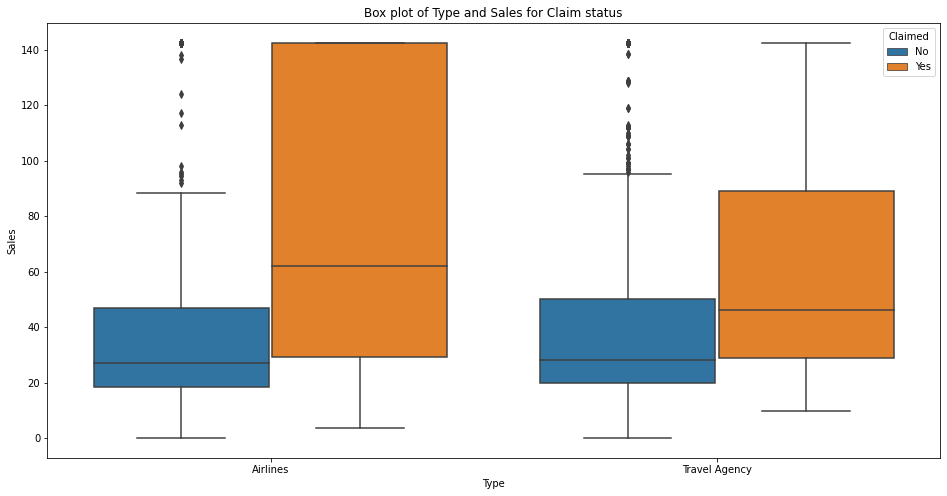

In [29]:
plt.figure(figsize=[16,8])
sns.boxplot(x='Type',y='Sales', hue='Claimed', data=df_insurance)
plt.title('Box plot of Type and Sales for Claim status')

'Airlines' have more sales compared to 'Travel Agency' for claimed customers and vice versa for non-claimed customers.

Text(0.5, 1.0, 'Box plot of Channel and Sales for Claim status')

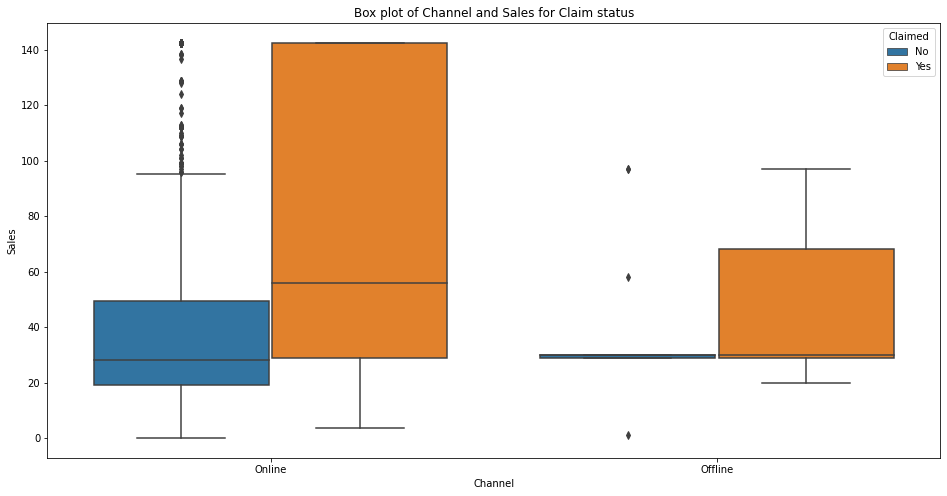

In [30]:
plt.figure(figsize=[16,8])
sns.boxplot(x='Channel',y='Sales', hue='Claimed', data=df_insurance)
plt.title('Box plot of Channel and Sales for Claim status')

'Online' services are more preferred for tour planning.

Text(0.5, 1.0, 'Box plot of Destination and Sales for Claim status')

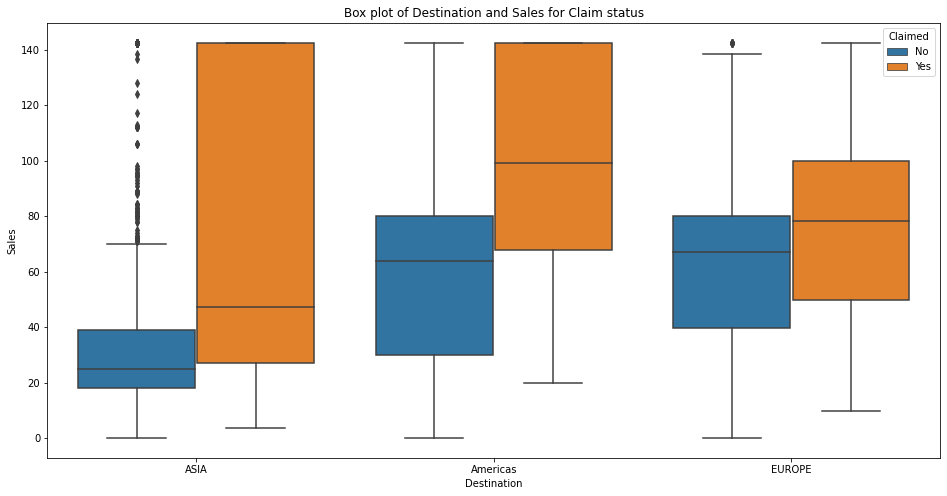

In [31]:
plt.figure(figsize=[16,8])
sns.boxplot(x='Destination',y='Sales', hue='Claimed', data=df_insurance)
plt.title('Box plot of Destination and Sales for Claim status')

1) Customers spending more across 'Asia' and 'America' compared to 'Europe'.

2) On an average, 'America' has more sales for both claimed and non-claimed customers (almost similar with 'Europe' for non-claimed customers)

Text(0.5, 1.0, 'Box plot of Destination and Duration for Claim status')

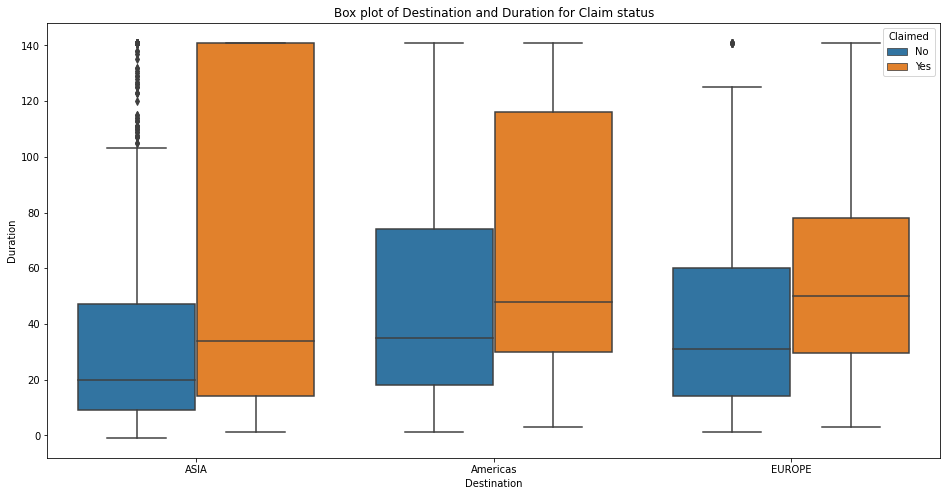

In [32]:
plt.figure(figsize=[16,8])
sns.boxplot(x='Destination',y='Duration', hue='Claimed', data=df_insurance)
plt.title('Box plot of Destination and Duration for Claim status')

On an average, customers are spending more time in 'America', and then in 'Asia'

In [33]:
df_insurance.nunique()

Age              41
Agency_Code       4
Type              2
Claimed           2
Commision       251
Channel           2
Duration        139
Sales           258
Product Name      5
Destination       3
dtype: int64

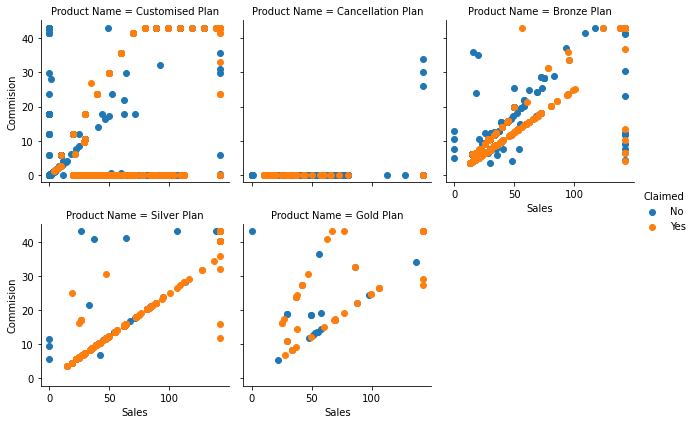

In [14]:
g = sns.FacetGrid(df_insurance, col="Product Name", hue='Claimed',col_wrap=3, height=3)
g = g.map(plt.scatter, "Sales", 'Commision')
g.add_legend()

1) For 'Silver plan' and 'Gold plan', there is very good correlation b/w Sales and Commision.

2) For 'Customised plan' and 'Bronze plan', there is very moderate correlation b/w Sales and Commision.

3) Poor correlation exists for 'Cancellation plan' b/w Sales and Commision.




## 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network


2.2 Data Split: Split the data into test and train(1 pts),\
Build classification model CART (1.5 pts), \
Random Forest (1.5 pts), Artificial Neural Network(1.5 pts).

Object data should be converted into categorical/numerical data to fit in the models.(pd.categorical().codes(), pd.get_dummies(drop_first=True)) 

Data split, ratio defined for the split, train-test split should be discussed. Any reasonable split is acceptable. \
Use of random state is mandatory. 

Successful implementation of each model.

Logical reason behind the selection of different values for the parameters involved in each model.

Apply grid search for each model and make models on best_params.

Feature importance for each model.\
5.5

## Data Encoding:

Converting object data into categorical/numercial data:

In [15]:
for feature in df_insurance: 
    if df_insurance[feature].dtype == 'object': 
        df_insurance[feature] = pd.Categorical(df_insurance[feature]).codes  


In [16]:
df_insurance.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0,0.00,1,34.0,20.00,2,0
2,39.0,1,1,0,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0,0.00,1,4.0,26.00,1,0
4,33.0,3,0,0,6.30,1,53.0,18.00,0,0


Dataset encoded successfully

In [17]:
df_insurance1=df_insurance.copy()
df_insurance1.shape

(3000, 10)

We can see dataset has been copied successfully

Let us use the scaled data for ANN model and non-scaled data for CART and RF models.

## Splitting the data into Train and Test set

In [18]:
X = df_insurance.drop("Claimed", axis=1)

y = df_insurance.pop("Claimed") 

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.30, random_state = 1)

In [21]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (2100, 9)
X_test (900, 9)
y_train (2100,)
y_test (900,)


Dataset has been splitted successfully with 30% of the test data.

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve

## 1) DecisionTree model:

In [92]:
dt_model1=DecisionTreeClassifier(criterion='gini')
dt_model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [93]:
from sklearn import tree

In [94]:
train_char_label = ['No', 'Yes']
insurance_Tree_File = open('d:\insurance_tree.dot','w')
dot_data = tree.export_graphviz(dt_model1, out_file=insurance_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

insurance_Tree_File.close()

As per tree diagram, best feature taken for decision tree is 'Agency_code', gini gain is 0.436.

From tree diagram, we can choose optimum depth as 10

In [95]:
from sklearn.model_selection import GridSearchCV

param_grid_dt = {
    'max_depth': [6, 7, 8, 9],
    'min_samples_leaf': [10, 15, 20, 25],
    'min_samples_split': [30, 45, 60, 75]
}

dt_model2 = DecisionTreeClassifier(criterion='gini')

grid_search_dt = GridSearchCV(estimator = dt_model2, param_grid = param_grid_dt, cv = 3)

In [96]:
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [6, 7, 8, 9],
                         'min_samples_leaf': [10, 15, 20, 25],
                         'min_samples_split': [30, 45, 60, 75]})

In [97]:
grid_search_dt.best_params_

{'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 75}

In [98]:
best_grid_dt = grid_search_dt.best_estimator_

In [99]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid_dt, out_file= tree_regularized ,
                                feature_names = list(X_train),
                                class_names = list(train_char_label))

tree_regularized.close()
dot_data

In [100]:
print (pd.DataFrame(grid_search_dt.best_estimator_.feature_importances_, columns = ["Imp"], index = X_train.columns))


                   Imp
Age           0.035301
Agency_Code   0.543867
Type          0.000000
Commision     0.027879
Channel       0.000000
Duration      0.067383
Sales         0.256950
Product Name  0.068620
Destination   0.000000


From Gridsearch also, we can see 'Agency_Code' is the best feature for the classification.

## 2) Random Forest Classifier:

In [25]:
rfcl1 = RandomForestClassifier(n_estimators=101, 
                              oob_score=True, 
                              max_depth=10, 
                              max_features=5, 
                              min_samples_leaf=50,
                              min_samples_split=100)
rfcl1 = rfcl1.fit(X_train, y_train)

In [26]:
rfcl1.oob_score_

0.7866666666666666

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid_rf = {
    'max_depth': [7, 10],
    'max_features': [4, 6],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [150, 300],
    'n_estimators': [101, 301]
}

rfcl2= RandomForestClassifier()

grid_search_rf = GridSearchCV(estimator = rfcl2, param_grid = param_grid_rf, cv = 3) 


In [29]:
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [150, 300],
                         'n_estimators': [101, 301]})

In [52]:
grid_search_rf.best_params_

{'max_depth': 7,
 'max_features': 4,
 'min_samples_leaf': 100,
 'min_samples_split': 300,
 'n_estimators': 101}

In [53]:
best_grid_rf = grid_search_rf.best_estimator_

In [54]:
print (pd.DataFrame(grid_search_rf.best_estimator_.feature_importances_, columns = ["Imp"], index = X_train.columns))


                   Imp
Age           0.009411
Agency_Code   0.358238
Type          0.091378
Commision     0.093730
Channel       0.000000
Duration      0.028239
Sales         0.119442
Product Name  0.294780
Destination   0.004781


By RF model also, "Agency_Code" is best feature for model building.

## 3) ANN:

Feature scaling:

In [33]:
df_insurance1

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0,0.7000,1,7.0,2.51,2,0
1,36.0,2,1,0,0.0000,1,34.0,20.00,2,0
2,39.0,1,1,0,5.9400,1,3.0,9.90,2,1
3,36.0,2,1,0,0.0000,1,4.0,26.00,1,0
4,33.0,3,0,0,6.3000,1,53.0,18.00,0,0
...,...,...,...,...,...,...,...,...,...,...
2995,28.0,1,1,1,43.0875,1,141.0,142.50,3,1
2996,35.0,0,0,0,13.5000,1,5.0,54.00,3,0
2997,36.0,2,1,0,0.0000,1,54.0,28.00,2,0
2998,34.0,0,0,1,7.6400,1,39.0,30.55,0,0


In [34]:
X1 = df_insurance1.drop("Claimed", axis=1)

y1 = df_insurance1.pop("Claimed") 

In [35]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1, y1, test_size = 0.30, random_state = 1)

In [36]:
print('X1_train', X_train.shape)
print('X1_test', X_test.shape)
print('y1_train', y_train.shape)
print('y1_test', y_test.shape)

X1_train (2100, 9)
X1_test (900, 9)
y1_train (2100,)
y1_test (900,)


In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
sc = StandardScaler()

In [39]:
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

In [40]:
X1_train

array([[-0.16645631,  0.72815922,  0.80520286, ..., -0.71237139,
         0.24642411, -0.43926017],
       [-0.16645631,  0.72815922,  0.80520286, ..., -0.1975992 ,
         0.24642411,  1.27851702],
       [-1.05932541, -1.28518425, -1.24192306, ...,  2.15397374,
         1.83381865, -0.43926017],
       ...,
       [-0.16645631,  0.72815922,  0.80520286, ...,  0.29377425,
         0.24642411, -0.43926017],
       [ 0.72641279,  1.73483096, -1.24192306, ..., -0.75916886,
        -1.34097044, -0.43926017],
       [-0.16645631, -1.28518425, -1.24192306, ..., -0.65387455,
         1.83381865, -0.43926017]])

In [41]:
X1_test

array([[-1.72897723, -0.27851251,  0.80520286, ...,  0.57455908,
        -1.34097044,  2.99629421],
       [ 1.95410779, -1.28518425, -1.24192306, ..., -0.56027961,
        -1.34097044, -0.43926017],
       [-0.94771677, -1.28518425, -1.24192306, ..., -0.80596633,
        -1.34097044, -0.43926017],
       ...,
       [-0.16645631, -1.28518425, -1.24192306, ..., -0.54858024,
        -1.34097044, -0.43926017],
       [ 1.28445597,  1.73483096, -1.24192306, ..., -0.47838403,
        -1.34097044, -0.43926017],
       [-0.27806495,  1.73483096, -1.24192306, ..., -0.57197898,
        -1.34097044, -0.43926017]])

In [42]:
clf1 = MLPClassifier(hidden_layer_sizes=100,
                    max_iter=5000,
                    solver='sgd', 
                    verbose=True,  
                    random_state=21,
                    tol=0.01)


In [43]:
clf1.fit(X1_train, y1_train)

Iteration 1, loss = 0.64244509
Iteration 2, loss = 0.62392631
Iteration 3, loss = 0.60292414
Iteration 4, loss = 0.58458220
Iteration 5, loss = 0.56914550
Iteration 6, loss = 0.55651481
Iteration 7, loss = 0.54598011
Iteration 8, loss = 0.53752961
Iteration 9, loss = 0.53051147
Iteration 10, loss = 0.52440802
Iteration 11, loss = 0.51934384
Iteration 12, loss = 0.51483466
Iteration 13, loss = 0.51108343
Iteration 14, loss = 0.50763356
Iteration 15, loss = 0.50476577
Iteration 16, loss = 0.50218466
Iteration 17, loss = 0.49989583
Iteration 18, loss = 0.49786338
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=100, max_iter=5000, random_state=21,
              solver='sgd', tol=0.01, verbose=True)

In [44]:
param_grid_ann = {
    'hidden_layer_sizes': [(100,100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01],
    'max_iter' : [10000]
}

ann1 = MLPClassifier()

grid_search_ann = GridSearchCV(estimator = ann1, param_grid = param_grid_ann, cv = 3)

In [45]:
grid_search_ann.fit(X1_train, y1_train)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(100, 100, 100)],
                         'max_iter': [10000], 'solver': ['sgd', 'adam'],
                         'tol': [0.1, 0.01]})

In [46]:
grid_search_ann.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100, 100),
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.1}

In [47]:
best_grid_ann = grid_search_ann.best_estimator_


## 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 


2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy (1 pts),\
Confusion Matrix (2 pts),\
Plot ROC curve and get ROC_AUC score for each model (2 pts),\
Make classification reports for each model. Write inferences on each model (2 pts).\

Calculate Train and Test Accuracies for each model. \
Comment on the validness of models (overfitting or underfitting) Build confusion matrix for each model. Comment on the positive class in hand. Must clearly show obs/pred in row/col \
Plot roc_curve for each model. \
Calculate roc_auc_score for each model. Comment on the above calculated scores and plots.\
Build classification reports for each model. Comment on f1 score, precision and recall, which one is important here.\
7

## 1) Decision Tree model:

In [101]:
acc_dt_train=best_grid_dt.score(X_train,y_train)
acc_dt_train

0.8028571428571428

In [102]:
acc_dt_test=best_grid_dt.score(X_test,y_test)
acc_dt_test

0.76

In [103]:
ytrain_predict_dt = best_grid_dt.predict(X_train)
ytest_predict_dt = best_grid_dt.predict(X_test)

In [105]:
ytest_predict_prob_dt=best_grid_dt.predict_proba(X_test)
ytest_predict_prob_dt
pd.DataFrame(ytest_predict_prob_dt).head()

,0,1
0,0.983333,0.016667
1,0.539474,0.460526
2,0.539474,0.460526
3,0.157895,0.842105
4,0.909722,0.090278


In [106]:
from sklearn.metrics import classification_report,confusion_matrix

In [107]:
confusion_matrix(y_train, ytrain_predict_dt)

array([[1319,  152],
       [ 262,  367]], dtype=int64)

In [108]:
confusion_matrix(y_test, ytest_predict_dt)

array([[542,  63],
       [153, 142]], dtype=int64)

roc_auc_dt_train: 0.854


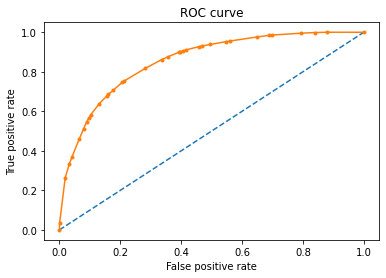

In [115]:
##dt_train data

probs_dt_train = best_grid_dt.predict_proba(X_train)
probs_dt_train = probs_dt_train[:, 1]
from sklearn.metrics import roc_auc_score
roc_auc_dt_train = roc_auc_score(y_train, probs_dt_train)
print('roc_auc_dt_train: %.3f' % roc_auc_dt_train)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs_dt_train)  
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()


roc_auc_dt_test: 0.796


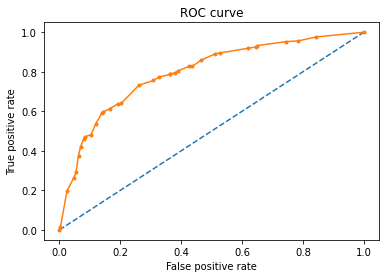

In [116]:
##dt_test data

probs_dt_test = best_grid_dt.predict_proba(X_test)
probs_dt_test = probs_dt_test[:, 1]
from sklearn.metrics import roc_auc_score
roc_auc_dt_test = roc_auc_score(y_test, probs_dt_test)
print('roc_auc_dt_test: %.3f' % roc_auc_dt_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs_dt_test)  
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()


In [109]:
from sklearn.metrics import classification_report,confusion_matrix

In [117]:
print(classification_report(y_train, ytrain_predict_dt))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1471
           1       0.71      0.58      0.64       629

    accuracy                           0.80      2100
   macro avg       0.77      0.74      0.75      2100
weighted avg       0.80      0.80      0.80      2100



In [118]:
df_dt_train=pd.DataFrame(classification_report(y_train, ytrain_predict_dt,output_dict=True)).transpose()
df_dt_train

,precision,recall,f1-score,support
0,0.834282,0.896669,0.864351,1471.000000
1,0.707129,0.583466,0.639373,629.000000
accuracy,0.802857,0.802857,0.802857,0.802857
macro avg,0.770706,0.740067,0.751862,2100.000000
weighted avg,0.796197,0.802857,0.796965,2100.000000


In [119]:
print(classification_report(y_test, ytest_predict_dt))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       605
           1       0.69      0.48      0.57       295

    accuracy                           0.76       900
   macro avg       0.74      0.69      0.70       900
weighted avg       0.75      0.76      0.75       900



In [120]:
df_dt_test=pd.DataFrame(classification_report(y_test, ytest_predict_dt,output_dict=True)).transpose()
df_dt_test

,precision,recall,f1-score,support
0,0.779856,0.895868,0.833846,605.00
1,0.692683,0.481356,0.568000,295.00
accuracy,0.760000,0.760000,0.760000,0.76
macro avg,0.736270,0.688612,0.700923,900.00
weighted avg,0.751283,0.760000,0.746708,900.00


## 2) RF model:

In [55]:
acc_rf_train=best_grid_rf.score(X_train,y_train)
acc_rf_train

0.78

In [56]:
acc_rf_test=best_grid_rf.score(X_test,y_test)
acc_rf_test

0.7466666666666667

In [57]:
ytrain_predict_rf = best_grid_rf.predict(X_train)
ytest_predict_rf = best_grid_rf.predict(X_test)

In [59]:
ytest_predict_prob_rf=best_grid_rf.predict_proba(X_test)
ytest_predict_prob_rf
pd.DataFrame(ytest_predict_prob_rf).head()

,0,1
0,0.756064,0.243936
1,0.572361,0.427639
2,0.552778,0.447222
3,0.296836,0.703164
4,0.922505,0.077495


In [60]:
confusion_matrix(y_train, ytrain_predict_rf)

array([[1348,  123],
       [ 339,  290]], dtype=int64)

In [61]:
confusion_matrix(y_test, ytest_predict_rf)

array([[566,  39],
       [189, 106]], dtype=int64)

roc_auc_rf_train: 0.821


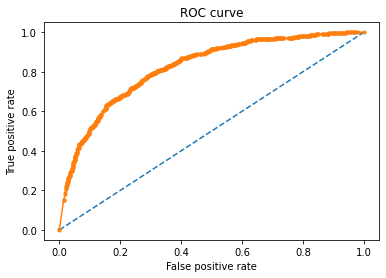

In [62]:
##rf_train data

probs_rf_train = best_grid_rf.predict_proba(X_train)
probs_rf_train = probs_rf_train[:, 1]
from sklearn.metrics import roc_auc_score
roc_auc_rf_train = roc_auc_score(y_train, probs_rf_train)
print('roc_auc_rf_train: %.3f' % roc_auc_rf_train)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs_rf_train)  
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()


roc_auc_rf_test: 0.808


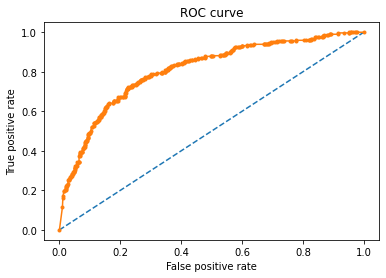

In [63]:
##rf_test data

probs_rf_test = best_grid_rf.predict_proba(X_test)
probs_rf_test = probs_rf_test[:, 1]
from sklearn.metrics import roc_auc_score
roc_auc_rf_test = roc_auc_score(y_test, probs_rf_test)
print('roc_auc_rf_test: %.3f' % roc_auc_rf_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs_rf_test)  
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()


In [65]:
print(classification_report(y_train, ytrain_predict_rf))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      1471
           1       0.70      0.46      0.56       629

    accuracy                           0.78      2100
   macro avg       0.75      0.69      0.71      2100
weighted avg       0.77      0.78      0.76      2100



In [66]:
df_rf_train=pd.DataFrame(classification_report(y_train, ytrain_predict_rf,output_dict=True)).transpose()
df_rf_train

,precision,recall,f1-score,support
0,0.799052,0.916383,0.853705,1471.00
1,0.702179,0.461049,0.556622,629.00
accuracy,0.780000,0.780000,0.780000,0.78
macro avg,0.750615,0.688716,0.705163,2100.00
weighted avg,0.770036,0.780000,0.764721,2100.00


In [67]:
print(classification_report(y_test, ytest_predict_rf))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83       605
           1       0.73      0.36      0.48       295

    accuracy                           0.75       900
   macro avg       0.74      0.65      0.66       900
weighted avg       0.74      0.75      0.72       900



In [68]:
df_rf_test=pd.DataFrame(classification_report(y_test, ytest_predict_rf,output_dict=True)).transpose()
df_rf_test

,precision,recall,f1-score,support
0,0.749669,0.935537,0.832353,605.000000
1,0.731034,0.359322,0.481818,295.000000
accuracy,0.746667,0.746667,0.746667,0.746667
macro avg,0.740352,0.647430,0.657086,900.000000
weighted avg,0.743561,0.746667,0.717455,900.000000


## 3) ANN model:

In [69]:
acc_ann_train=best_grid_ann.score(X1_train,y1_train)
acc_ann_train

0.7847619047619048

In [70]:
acc_ann_test=best_grid_ann.score(X1_test,y1_test)
acc_ann_test

0.76

In [71]:
ytrain_predict_ann = best_grid_ann.predict(X1_train)
ytest_predict_ann = best_grid_ann.predict(X1_test)

In [72]:
ytest_predict_prob_ann=best_grid_ann.predict_proba(X_test)
ytest_predict_prob_ann
pd.DataFrame(ytest_predict_prob_ann).head()

,0,1
0,0.000186,0.999814
1,0.096462,0.903538
2,0.987302,0.012698
3,0.000042,0.999958
4,0.582070,0.417930


In [73]:
confusion_matrix(y1_train, ytrain_predict_ann)

array([[1315,  156],
       [ 296,  333]], dtype=int64)

In [74]:
confusion_matrix(y1_test, ytest_predict_ann)

array([[550,  55],
       [161, 134]], dtype=int64)

roc_auc_ann_train: 0.837


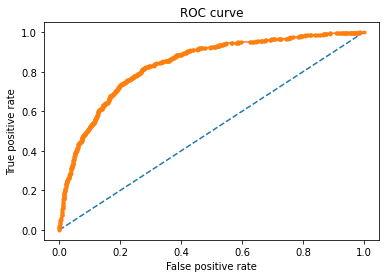

In [76]:
##ann_train data

probs_ann_train = best_grid_ann.predict_proba(X1_train)
probs_ann_train = probs_ann_train[:, 1]
from sklearn.metrics import roc_auc_score
roc_auc_ann_train = roc_auc_score(y1_train, probs_ann_train)
print('roc_auc_ann_train: %.3f' % roc_auc_ann_train)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y1_train, probs_ann_train)  
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()


roc_auc_ann_test: 0.809


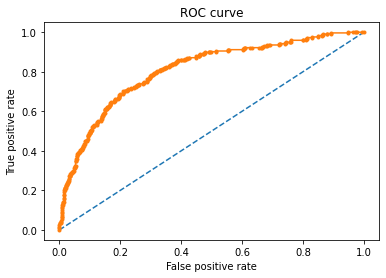

In [78]:
##ann_test data

probs_ann_test = best_grid_ann.predict_proba(X1_test)
probs_ann_test = probs_ann_test[:, 1]
from sklearn.metrics import roc_auc_score
roc_auc_ann_test = roc_auc_score(y1_test, probs_ann_test)
print('roc_auc_ann_test: %.3f' % roc_auc_ann_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y1_test, probs_ann_test)  
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()


In [79]:
print(classification_report(y1_train, ytrain_predict_ann))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1471
           1       0.68      0.53      0.60       629

    accuracy                           0.78      2100
   macro avg       0.75      0.71      0.72      2100
weighted avg       0.78      0.78      0.78      2100



In [80]:
df_ann_train=pd.DataFrame(classification_report(y1_train, ytrain_predict_ann,output_dict=True)).transpose()
df_ann_train

,precision,recall,f1-score,support
0,0.816263,0.893950,0.853342,1471.000000
1,0.680982,0.529412,0.595707,629.000000
accuracy,0.784762,0.784762,0.784762,0.784762
macro avg,0.748622,0.711681,0.724524,2100.000000
weighted avg,0.775743,0.784762,0.776174,2100.000000


In [81]:
print(classification_report(y1_test, ytest_predict_ann))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84       605
           1       0.71      0.45      0.55       295

    accuracy                           0.76       900
   macro avg       0.74      0.68      0.69       900
weighted avg       0.75      0.76      0.74       900



In [82]:
df_ann_test=pd.DataFrame(classification_report(y1_test, ytest_predict_ann,output_dict=True)).transpose()
df_ann_test

,precision,recall,f1-score,support
0,0.773558,0.909091,0.835866,605.00
1,0.708995,0.454237,0.553719,295.00
accuracy,0.760000,0.760000,0.760000,0.76
macro avg,0.741277,0.681664,0.694793,900.00
weighted avg,0.752396,0.760000,0.743385,900.00



## 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

2.4 Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner (2.5 pts). \  Describe on which model is best/optimized (1.5 pts ).\
A table containing all the values of accuracies, precision, recall, auc_roc_score, f1 score. \
Comparison between the different models(final) on the basis of above table values.\
After comparison which model suits the best for the problem in hand on the basis of different measures.\
Comment on the final model.\
4

In [121]:
index=['Accuracy', 'AUC', 'Precision','Recall','F1 Score']
data = pd.DataFrame({'CART Train':[acc_dt_train, roc_auc_dt_train, df_dt_train.iloc[1,0], df_dt_train.iloc[1,1], df_dt_train.iloc[1,2]],
                     'CART Test':[acc_dt_test, roc_auc_dt_test, df_dt_test.iloc[1,0], df_dt_test.iloc[1,1], df_dt_test.iloc[1,2]],
                    'Random Forest Train':[acc_rf_train, roc_auc_rf_train, df_rf_train.iloc[1,0], df_rf_train.iloc[1,1], df_rf_train.iloc[1,2]],
        'Random Forest Test':[acc_rf_test, roc_auc_rf_test, df_rf_test.iloc[1,0], df_rf_test.iloc[1,1], df_rf_test.iloc[1,2]],
           'Neural Network Train':[acc_ann_train, roc_auc_ann_train, df_ann_train.iloc[1,0],df_ann_train.iloc[1,1], df_ann_train.iloc[1,2]],
            'Neural Network Test':[acc_ann_test, roc_auc_ann_train, df_ann_test.iloc[1,0], df_ann_test.iloc[1,1], df_ann_test.iloc[1,2]]},
                    index=index).T
round(data,2)

,Accuracy,AUC,Precision,Recall,F1 Score
CART Train,0.80,0.85,0.71,0.58,0.64
CART Test,0.76,0.80,0.69,0.48,0.57
Random Forest Train,0.78,0.82,0.70,0.46,0.56
Random Forest Test,0.75,0.81,0.73,0.36,0.48
Neural Network Train,0.78,0.84,0.68,0.53,0.60
Neural Network Test,0.76,0.84,0.71,0.45,0.55


CONCLUSION :
I am selecting the RF model, as it has better accuracy, precsion, recall, f1 score better than other two CART & NN.¶

## 2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations.

2.5 Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective.\
There should be at least 3-4 Recommendations and insights in total.\
Recommendations should be easily understandable and business specific, students should not give any technical suggestions.\
Full marks should only be allotted if the recommendations are correct and business specific.\
4.5

I strongly recommended we collect more real time unstructured data and past data if possible.

This is understood by looking at the insurance data by drawing relations between different variables such as day of the incident, time, age group, and associating it with other external information such as location, behavior patterns, weather information, airline/vehicle types, etc.

• Streamlining online experiences benefitted customers, leading to an increase in conversions, which subsequently raised profits. • As per the data 90% of insurance is done by online channel. • Other interesting fact, is almost all the offline business has a claimed associated, need to find why? • Need to train the JZI agency resources to pick up sales as they are in bottom, need to run promotional marketing campaign or evaluate if we need to tie up with alternate agency • Also based on the model we are getting 80%accuracy, so we need customer books airline tickets or plans, cross sell the insurance based on the claim data pattern. • Other interesting fact is more sales happen via Agency than Airlines and the trend shows the claim are processed more at Airline. So we may need to deep dive into the process to understand the workflow and why?

Key performance indicators (KPI) The KPI’s of insurance claims are: • Reduce claims cycle time • Increase customer satisfaction • Combat fraud • Optimize claims recovery • Reduce claim handling costs Insights gained from data and AI-powered analytics could expand the boundaries of insurability, extend existing products, and give rise to new risk transfer solutions in areas like a non-damage business interruption and reputational damage.


Quality of Business Report (Please refer to the Evaluation Guidelines for Business report checklist. Marks in this criteria are at the moderator's discretion)\
6\
Please reflect on all that you learnt and fill this reflection report:https://docs.google.com/forms/d/e/1FAIpQLSd7e_bJVCiFpZAYbBTMtKrr9TLRnl8kuvZT7IsZ5MSjRtfjcQ/viewform?usp=sf_link \
0